# NLP要解决的任务：
* 1.处理文本数据，首先对文本数据进行分词操作
* 2.分完词它不还是字符串，计算机还不认识，希望把字符映射成实际的特征（向量）
* 3.输入搞定之后，需要构建模型（一般都用预训练模型，例如BERT，GPT系列等）
* 4.怎么去完成我们的自己的任务呢，基本上就是在预训练模型的基础上进行微调（训练自己数据的过程）

# 基本流程概述

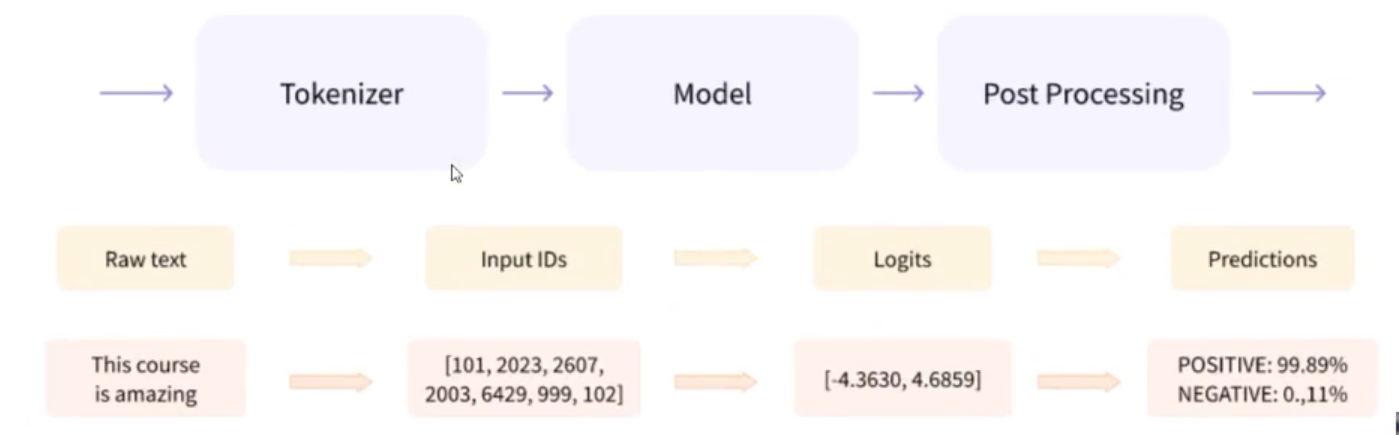

# Tokenizer要做的事情
* 分词，分字以及一些特殊符号（起始，终止，间隔，分类等特殊字符可以自己设计的）
* 对每一个token映射得到一个ID（每个词都会对应一个唯一的ID）
* 还有一些辅助信息也可以得到，比如当前词属于哪个句子（还有一些MASK，表示是否是原来的词还是特殊字符等）

In [1]:
from transformers import AutoTokenizer

checkpoint = "schen/longformer-chinese-base-4096"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [2]:
raw_inputs = [
    "我爱深度学习！",
    "今天下午面试，有点紧张"
]

# padding是否填充特殊字符，占位符
# truncation是否截断
# return_tensors 使用pytorch版本
inputs = tokenizer(raw_inputs,padding=True,truncation=True,return_tensors="pt")
print(inputs)

# input_ids 字符对应的索引值
# token_type_ids 对应这是第几句话
# attention_mask 1 表示加入到self-attention计算中，0不加入

{'input_ids': tensor([[ 101, 2769, 4263, 3918, 2428, 2110,  739, 8013,  102,    0,    0,    0,
            0],
        [ 101,  791, 1921,  678, 1286, 7481, 6407, 8024, 3300, 4157, 5165, 2476,
          102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


In [3]:
tokenizer.decode([ 101,  791, 1921,  678, 1286, 7481, 6407, 8024, 3300, 4157, 5165, 2476,
          102])

# 这些特殊字符是因为人家模型训练的时候就加入了这个东西，所以这里默认也会加入

'[CLS] 今 天 下 午 面 试 ， 有 点 紧 张 [SEP]'

# 模型加载方法
* 直接指定好模型名字即可，这里先不加输出层

In [4]:
from transformers import AutoModel

checkpoint = "schen/longformer-chinese-base-4096"
model = AutoModel.from_pretrained(checkpoint)

Some weights of the model checkpoint at schen/longformer-chinese-base-4096 were not used when initializing BertModel: ['bert.encoder.layer.1.attention.self.query_global.weight', 'bert.encoder.layer.0.attention.self.query_global.weight', 'bert.encoder.layer.4.attention.self.value_global.weight', 'bert.encoder.layer.5.attention.self.key_global.bias', 'bert.encoder.layer.8.attention.self.value_global.weight', 'bert.encoder.layer.3.attention.self.key_global.weight', 'bert.encoder.layer.2.attention.self.query_global.weight', 'bert.encoder.layer.11.attention.self.key_global.bias', 'bert.encoder.layer.9.attention.self.query_global.bias', 'bert.encoder.layer.3.attention.self.value_global.bias', 'bert.encoder.layer.7.attention.self.value_global.weight', 'bert.encoder.layer.4.attention.self.value_global.bias', 'bert.encoder.layer.1.attention.self.key_global.bias', 'bert.encoder.layer.1.attention.self.query_global.bias', 'bert.encoder.layer.4.attention.self.key_global.bias', 'bert.encoder.layer.1

In [5]:
model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(21128, 768, padding_idx=0)
    (position_embeddings): Embedding(4096, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
         

In [6]:
outputs = model(**inputs)
print(outputs.last_hidden_state.shape)

# 2 表示batch，一个两个文本，所以是2
# 13 表示13个token
# 768 表示每个token对应的向量

torch.Size([2, 13, 768])


## 模型的逻辑

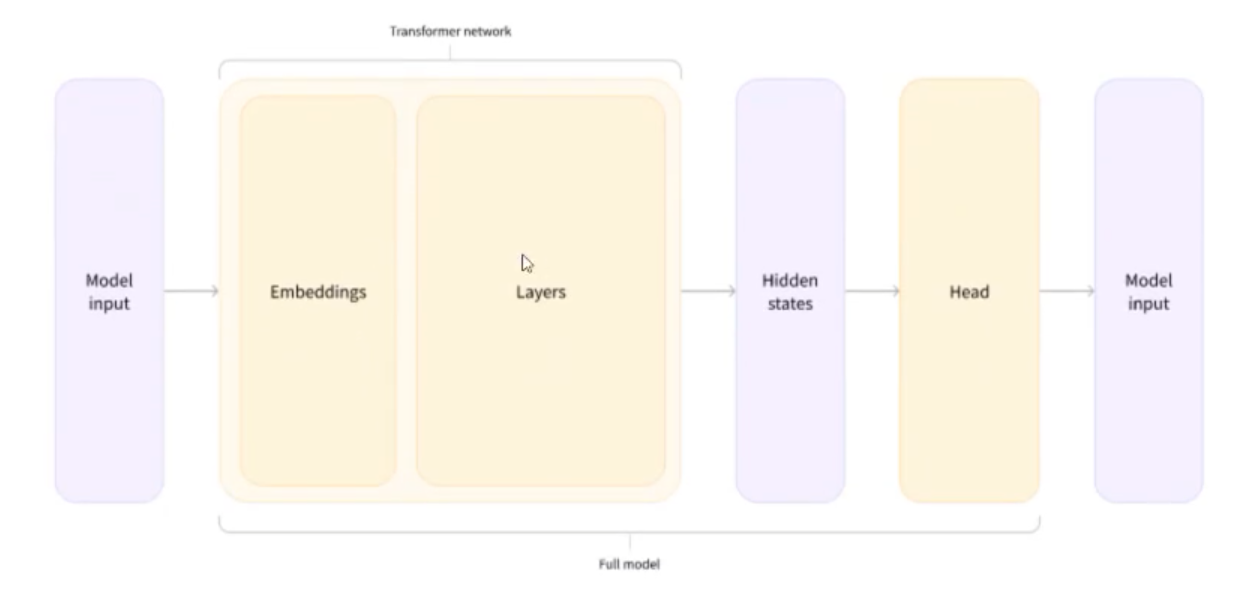

## 输出头也可以一并加上

In [7]:
from transformers import AutoModelForSequenceClassification

# AutoModelForSequenceClassification 是对序列做分类
# 用什么分类，就选择什么输出头，就导什么东西

checkpoint = "schen/longformer-chinese-base-4096"
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
outputs = model(**inputs)
print(outputs.logits.shape)

Some weights of the model checkpoint at schen/longformer-chinese-base-4096 were not used when initializing BertForSequenceClassification: ['bert.encoder.layer.1.attention.self.query_global.weight', 'bert.encoder.layer.0.attention.self.query_global.weight', 'bert.encoder.layer.4.attention.self.value_global.weight', 'bert.encoder.layer.5.attention.self.key_global.bias', 'bert.encoder.layer.8.attention.self.value_global.weight', 'bert.encoder.layer.3.attention.self.key_global.weight', 'bert.encoder.layer.2.attention.self.query_global.weight', 'bert.encoder.layer.11.attention.self.key_global.bias', 'bert.encoder.layer.9.attention.self.query_global.bias', 'bert.encoder.layer.3.attention.self.value_global.bias', 'bert.encoder.layer.7.attention.self.value_global.weight', 'bert.encoder.layer.4.attention.self.value_global.bias', 'bert.encoder.layer.1.attention.self.key_global.bias', 'bert.encoder.layer.1.attention.self.query_global.bias', 'bert.encoder.layer.4.attention.self.key_global.bias', '

torch.Size([2, 2])


NLP任务没有回归那一说法，所有任务都是分类。无外乎就是把分类做到什么程度。
我们针对不同位置的分类，选择出不同的输出头，AutoModelForSequenceClassification。
不同的输出头就是对谁做分类

In [8]:
model

# 后面多了一个classifier这个分类。可以自己写，可以十分类
# dropout是一个预测值，还未经过softmax,才能得到一个最终的类别

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(21128, 768, padding_idx=0)
      (position_embeddings): Embedding(4096, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

In [9]:
import torch

# dim=-1: 最后一个维度加和为1。
predictions = torch.nn.functional.softmax(outputs.logits,dim=-1)
print(predictions)

tensor([[0.7734, 0.2266],
        [0.7992, 0.2008]], grad_fn=<SoftmaxBackward0>)


id2label这个是可以自己设计的，标签名字对应都可以自己指定。自己指定一个list就可以重写了

In [10]:
model.config.id2label

{0: 'LABEL_0', 1: 'LABEL_1'}

# padding的作用

In [11]:
seq_id1 = [[200,200,200]]
seq_id2 = [[200,200]]

batched_ids = [
    [200,200,200],
    [200,200,tokenizer.pad_token_id]
]

print(model(torch.tensor(seq_id1)).logits)
print(model(torch.tensor(seq_id2)).logits)

print(model(torch.tensor(batched_ids)).logits)

tensor([[ 0.5648, -0.5370]], grad_fn=<AddmmBackward0>)
tensor([[ 0.5648, -0.5370]], grad_fn=<AddmmBackward0>)
tensor([[ 0.5648, -0.5370],
        [ 0.5751, -0.5884]], grad_fn=<AddmmBackward0>)


为啥结果会不一样？那是因为你填充的那个符号它不认识，跟它默认的id不一样，所以一起拿过来计算了。
所以在你指定填充之后，还要指定attention_mask，相当于告诉它这部分不参与计算

# attention_mask的作用

In [15]:
batched_ids = [
    [200,200,200],
    [200,200,tokenizer.pad_token_id]
]

attention_mask = [
    [1,1,1],
    [1,1,0]
]

outputs = model(torch.tensor(batched_ids),attention_mask=torch.tensor(attention_mask))
print(outputs.logits)

tensor([[ 0.5648, -0.5370],
        [ 0.5648, -0.5370]], grad_fn=<AddmmBackward0>)


# 不同的padding方法

In [16]:
seq = ["我爱学习","争取十月份完成毕业论文实验","读书是世界上最简单的事情，没有之一"]

In [17]:
# 按照最长填充
model_inputs = tokenizer(seq,padding="longest")
model_inputs

{'input_ids': [[101, 2769, 4263, 2110, 739, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 751, 1357, 1282, 3299, 819, 2130, 2768, 3684, 689, 6389, 3152, 2141, 7741, 102, 0, 0, 0, 0], [101, 6438, 741, 3221, 686, 4518, 677, 3297, 5042, 1296, 4638, 752, 2658, 8024, 3766, 3300, 722, 671, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [18]:
# BERT默认是512，Longformer默认是4096
model_inputs = tokenizer(seq,padding="max_length")
model_inputs

{'input_ids': [[101, 2769, 4263, 2110, 739, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [19]:
# 填充到多少
model_inputs = tokenizer(seq,padding="max_length",max_length=15)
model_inputs

{'input_ids': [[101, 2769, 4263, 2110, 739, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 751, 1357, 1282, 3299, 819, 2130, 2768, 3684, 689, 6389, 3152, 2141, 7741, 102], [101, 6438, 741, 3221, 686, 4518, 677, 3297, 5042, 1296, 4638, 752, 2658, 8024, 3766, 3300, 722, 671, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [20]:
# 到多少就截断
model_inputs = tokenizer(seq,padding="max_length",max_length=15,truncation=True)
model_inputs

{'input_ids': [[101, 2769, 4263, 2110, 739, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 751, 1357, 1282, 3299, 819, 2130, 2768, 3684, 689, 6389, 3152, 2141, 7741, 102], [101, 6438, 741, 3221, 686, 4518, 677, 3297, 5042, 1296, 4638, 752, 2658, 8024, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [21]:
# 最好返回tensor
model_inputs = tokenizer(seq,padding=True,return_tensors="pt")
model_inputs

{'input_ids': tensor([[ 101, 2769, 4263, 2110,  739,  102,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0],
        [ 101,  751, 1357, 1282, 3299,  819, 2130, 2768, 3684,  689, 6389, 3152,
         2141, 7741,  102,    0,    0,    0,    0],
        [ 101, 6438,  741, 3221,  686, 4518,  677, 3297, 5042, 1296, 4638,  752,
         2658, 8024, 3766, 3300,  722,  671,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}